# Approssimazione con $S^0 (\Omega)$
### (E2.1-E3.1)

Dato $ \Omega = [a,b)$, una partizione $ P = \{ t_0 = a < t_1 < \ldots < t_n = b \} $ e un parametro $ \beta \in [0,1] $ vogliamo studiare l'operatore $$\mathcal{A}_{\beta,P} : \mathcal{C}^0(\Omega) \to S^0(\Omega)$$ definito come $$ f \mapsto \sum_{i=1}^n f(\eta_{k,\beta}) \chi_{I_k}$$ con $\eta_{k,\beta} = t_{k-1} + \beta (t_k - t_{k-1})$

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider
import ipywidgets as widgets

import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as PD # nothing political here

In [3]:
from Partition import Partition
from Approximation import MidpointApproximation, LinearContApproximation, L2ConstantApproximation
from ErrorMetrics import ErrorManager, MaxNorm, L2Norm, L2TrapNorm
from Tools import TestEOC

In [4]:
def _testInteractive(funct, a, b, n, beta):
    interp = MidpointApproximation(Partition.Uniform(a,b,n), funct, beta)
    interp.plot()
    
def interactive(fun):
    nSlid = IntSlider(min=1, max=30, step=1, continuous_update=False)
    betaSlid = FloatSlider(min=0.0, max=1.0, step=0.05, continuous_update=False)
    
    interact(_testInteractive, funct=fixed(fun), a=(-10.0,10.0, 0.5), b=(0.0,10.0, 0.5), n=nSlid, beta=betaSlid)

# Variazione dei parametri
Prendiamo come funzione $ f(x) = x^2 $ e confrontiamo la target function e l'approssimante al variare dei parametri

In [5]:
f = lambda x : x*x

In [6]:
interactive(f)

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0, step=0.5), FloatSlider(valu…

# Errore vs Beta

Presa $f(x) = x^2$ su $(-5, 5)$ facciamo variare $\beta$ in una partizione di $(0,1)$, approssimiamo con $n=100$ e calcoliamo l'errore in norma $L^{\infty}$

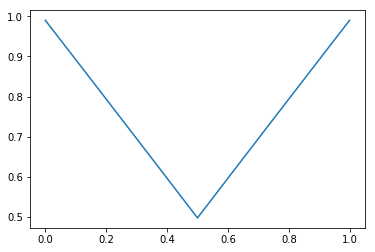

In [7]:
a = -5.0
b = 5.0
n = 100
errors = []
interps = []

candidateBetas = np.linspace(0.0, 1.0, 25) 
u = Partition.Uniform(a, b, n) # Creiamo la partizione di (a,b)

for beta in candidateBetas: # Iteriamo su tutti i possibili beta in (0,1)
    interp = MidpointApproximation(u, f, beta) #Calcoliamo l'approssimazione
    interps.append(interp) #Salviamo l'interpolata
    errors.append(MaxNorm(interp)) #Salviamo l'errore commesso
    
plt.plot(candidateBetas, errors) #Plottiamo
plt.show()

Possiamo notare che l'errore è minimo per $\beta = 0.5$, come suggerito dalla stima in E2.4

# EOC
Plottiamo l'errore in norma infinito vs il numero di elementi nella partizione che è proporzionale a $ \frac{1}{h} $
Definiamo come $EOC_n = \log_2 \left( \frac{e_{n/2}}{e_n} \right)$ e studiamo l'ordine di convergenza delle funzioni $f_{\rho}(x) = x^{\rho}$ con $x \in [0,1]$, $\rho \in [0,2]$. Con la convenzione che per $\rho=0$, $f(x) = -\left(\log(\frac{x}{e})\right)^{-1}$.

Ricordiamo che i risultati teorici ci dicono che:

1. $E_n(f)_{\infty}$ scende in modo lineare con la dimensione della partizione se e solo se f è Lipschitz.
2. $E_n(f)_{\infty}$ scende in modo proporzionale a $h_{\mathcal{P}}^{\alpha}$ con $\alpha \in (0,1)$ se e solo se $f \in Hol^{\alpha}\left([0,1]\right)$.
3. Se $E_n(f)_{\infty}$ scende più velocemente che linearmente, allora la $f$ è una costante.

In [8]:
clss = ["Midpoint", "Linear", "L2"]
interact(TestEOC, p=(0.0, 2.5, 0.05), n_start=fixed(1), runs=fixed(7), a=(-0.1, 0.1, 0.02), b=fixed(1), appr=clss);

interactive(children=(FloatSlider(value=1.25, description='p', max=2.5, step=0.05), FloatSlider(value=0.0, des…

Notiamo che per $p \gg 1$, l'EOC raggiunge il suo valore teorico solo per n più grandi. Si può spiegare a causa della norma $\mathcal{A}_r$ più grande di queste funzioni, o della loro costante di Lipschitz più grande.